<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import csv
import requests
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt  
import cv2 
import base64


In [22]:
def convert_to_base64(img):
    return base64.b64encode(cv2.imencode('.jpg', img)[1]).decode()

def test_base64(img_string):
    jpg_original = base64.b64decode(img_string)

    # Write to a file to show conversion worked
    with open('test.jpg', 'wb') as f_output:
        f_output.write(jpg_original)
    
    print('File saved as test.jpg')

def parseXML(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    data = {}

    data['folder'] = root.find('folder').text
    data['filename'] = root.find('filename').text
    data['path'] = root.find('path').text
    data['segmented'] = root.find('segmented').text
    data['database'] = root.find('source/database').text
    
    size = {}
    for i in root.findall('size/*'):
        size[i.tag] = i.text
    data['size'] = size
    
    objects = {}
    for c in root.findall('object'):
        name = c.find('name').text
        objects[name] = {}
        for b in c.findall('bndbox/*'):
            objects[name][b.tag] = int(b.text) 
    data['objects'] = objects    
    
    return data


def draw_rectangles(img_path,xml_data,display=False,base64=False):
    src = cv2.imread(img_path)    
    objects = xml_data['objects']
    for k,v in objects.items():
        cv2.rectangle(src, (objects[k]['xmin'], objects[k]['ymin']), (objects[k]['xmax'], objects[k]['ymax']), (0, 0, 255), 2)
        cv2.putText(src, k, (objects[k]['xmin'], objects[k]['ymin']-5), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    if display:
        cv2.imshow('Source',src)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    if base64:
        return convert_to_base64(src)
    
    return src

In [34]:
data = parseXML('./interview_task/sample_input_dataset/P00X000-2019092702224.xml')
data

{'folder': 'sample_input_dataset',
 'filename': 'P00X000-2019092702224.jpg',
 'path': '/home/user/test',
 'segmented': '0',
 'database': 'Unknown',
 'size': {'width': '576', 'height': '648', 'depth': '3'},
 'objects': {'lighter': {'xmin': 58, 'ymin': 353, 'xmax': 96, 'ymax': 440},
  'knife': {'xmin': 233, 'ymin': 173, 'xmax': 300, 'ymax': 234},
  'scissors': {'xmin': 182, 'ymin': 274, 'xmax': 287, 'ymax': 440},
  'keypad_mobile': {'xmin': 66, 'ymin': 34, 'xmax': 166, 'ymax': 145}}}

In [36]:
img = draw_rectangles('./interview_task/sample_input_dataset/P00X000-2019092702224.jpg', data, display=True)

In [33]:
b64 = convert_to_base64(img)

In [29]:
test_base64(b64)

File saved as test.jpg


In [5]:
tree = ET.parse('./interview_task/sample_input_dataset/P00X000-2019092701422.xml')
root = tree.getroot()

In [7]:
root.findall('*')

[<Element 'folder' at 0x000001E2EEF79D18>,
 <Element 'filename' at 0x000001E2EEF79D68>,
 <Element 'path' at 0x000001E2EEF79E08>,
 <Element 'source' at 0x000001E2EEF79E58>,
 <Element 'size' at 0x000001E2EEF79EF8>,
 <Element 'segmented' at 0x000001E2EEF7F098>,
 <Element 'object' at 0x000001E2EEF7F0E8>,
 <Element 'object' at 0x000001E2EEF7F408>,
 <Element 'object' at 0x000001E2EEF7F728>,
 <Element 'object' at 0x000001E2EEF7FA48>]

In [86]:
data = {}

data['folder'] = root.find('folder').text
data['filename'] = root.find('filename').text
data['path'] = root.find('path').text
data['segmented'] = root.find('segmented').text
data['database'] = root.find('source/database').text

In [76]:
size = {}
for i in root.findall('size/*'):
    size[i.tag] = i.text
    
data['size'] = size

In [78]:
objects = {}

for c in root.findall('object'):
    name = c.find('name').text
    objects[name] = {}
    for b in c.findall('bndbox/*'):
        objects[name][b.tag] = int(b.text) 
        
    
data['objects'] = objects    

In [79]:
data

{'folder': 'sample_input_dataset',
 'filename': 'P00X000-2019092701422.jpg',
 'path': '/home/user/test',
 'segmented': '0',
 'database': 'Unknown',
 'size': {'width': '576', 'height': '648', 'depth': '3'},
 'objects': {'bottle': {'xmin': 117, 'ymin': 237, 'xmax': 274, 'ymax': 517},
  'gun': {'xmin': 249, 'ymin': 215, 'xmax': 444, 'ymax': 368},
  'razor_blade': {'xmin': 319, 'ymin': 184, 'xmax': 360, 'ymax': 229},
  'lighter': {'xmin': 247, 'ymin': 158, 'xmax': 315, 'ymax': 217}}}

In [80]:
src = cv2.imread('./interview_task/sample_input_dataset/P00X000-2019092701422.jpg')

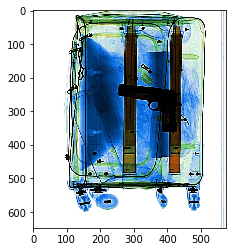

In [81]:
plt.imshow(src)

In [82]:
for k,v in objects.items():
    cv2.rectangle(src, (objects[k]['xmin'], objects[k]['ymin']), (objects[k]['xmax'], objects[k]['ymax']), (0, 0, 255), 2)
    cv2.putText(src, k, (objects[k]['xmin'], objects[k]['ymin']-5), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

In [83]:
cv2.imshow('Source',src)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [66]:


jpg_original = base64.b64decode(jpg_as_text)

# Write to a file to show conversion worked
with open('test.jpg', 'wb') as f_output:
    f_output.write(jpg_original)